In [1]:
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
results_df = pd.read_csv("C:\SentimentAnalysis\data\Cost of Living_youtube.csv")

In [3]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Search Term       2303 non-null   object 
 1   ID                2303 non-null   object 
 2   Title             2303 non-null   object 
 3   Author            2303 non-null   object 
 4   Date Uploaded     2303 non-null   object 
 5   Views             2303 non-null   int64  
 6   Likes_x           2303 non-null   int64  
 7   Channel ID        2303 non-null   object 
 8   Subscriber Count  2303 non-null   int64  
 9   Country           2303 non-null   object 
 10  Comment           2299 non-null   object 
 11  Likes_y           2299 non-null   float64
 12  AuthorChannelId   2299 non-null   object 
 13  PublishedAt       2299 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 252.0+ KB


In [4]:
results_df['Comment'][0:9]

0    Inflation is far more harmful to individuals t...
1    “I represent people who are stepped over and i...
2    What an angel that lady is ... I feel safer in...
3    The women who started this project are strong ...
4    Watching this film, I am torn between feeling ...
5    I've been lucky enough to stockpile cheap non-...
6    It's mind boggling that UK is in this state, w...
7    The blonde lady is a true angel trying to help...
8    Well done to all the people in this video for ...
Name: Comment, dtype: object

In [5]:
comments_series = results_df['Comment'][0:10]
comments_df = comments_series.to_frame()
comments_df.reset_index(drop=True, inplace=True)

In [6]:
comments_df

,Comment
0,Inflation is far more harmful to individuals t...
1,“I represent people who are stepped over and i...
2,What an angel that lady is ... I feel safer in...
3,The women who started this project are strong ...
4,"Watching this film, I am torn between feeling ..."
5,I've been lucky enough to stockpile cheap non-...
6,"It's mind boggling that UK is in this state, w..."
7,The blonde lady is a true angel trying to help...
8,Well done to all the people in this video for ...
9,Those women are the salt of the earth. Strong ...


In [7]:
example = comments_df['Comment'][0]
print(example)

Inflation is far more harmful to individuals than a collapsing stock or property market because it directly affects people's cost of living, which they immediately feel. It is not surprising that the current market sentiment is extremely pessimistic. In today's economy, assistance is critical if we are to survive.


In [8]:
import nltk 
tokens = nltk.word_tokenize(example)
tokens

['Inflation',
 'is',
 'far',
 'more',
 'harmful',
 'to',
 'individuals',
 'than',
 'a',
 'collapsing',
 'stock',
 'or',
 'property',
 'market',
 'because',
 'it',
 'directly',
 'affects',
 'people',
 "'s",
 'cost',
 'of',
 'living',
 ',',
 'which',
 'they',
 'immediately',
 'feel',
 '.',
 'It',
 'is',
 'not',
 'surprising',
 'that',
 'the',
 'current',
 'market',
 'sentiment',
 'is',
 'extremely',
 'pessimistic',
 '.',
 'In',
 'today',
 "'s",
 'economy',
 ',',
 'assistance',
 'is',
 'critical',
 'if',
 'we',
 'are',
 'to',
 'survive',
 '.']

In [9]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('Inflation', 'NN'), ('is', 'VBZ'), ('far', 'RB'), ('more', 'RBR'), ('harmful', 'JJ'), ('to', 'TO'), ('individuals', 'NNS'), ('than', 'IN'), ('a', 'DT'), ('collapsing', 'VBG'), ('stock', 'NN'), ('or', 'CC'), ('property', 'NN'), ('market', 'NN'), ('because', 'IN'), ('it', 'PRP'), ('directly', 'RB'), ('affects', 'VBZ'), ('people', 'NNS'), ("'s", 'POS'), ('cost', 'NN'), ('of', 'IN'), ('living', 'NN'), (',', ','), ('which', 'WDT'), ('they', 'PRP'), ('immediately', 'RB'), ('feel', 'VBP'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('surprising', 'JJ'), ('that', 'IN'), ('the', 'DT'), ('current', 'JJ'), ('market', 'NN'), ('sentiment', 'NN'), ('is', 'VBZ'), ('extremely', 'RB'), ('pessimistic', 'JJ'), ('.', '.'), ('In', 'IN'), ('today', 'NN'), ("'s", 'POS'), ('economy', 'NN'), (',', ','), ('assistance', 'NN'), ('is', 'VBZ'), ('critical', 'JJ'), ('if', 'IN'), ('we', 'PRP'), ('are', 'VBP'), ('to', 'TO'), ('survive', 'VB'), ('.', '.')]


In [10]:
tagged_ent =nltk.chunk.ne_chunk(tagged)
tagged_ent.pprint()

(S
  (GPE Inflation/NN)
  is/VBZ
  far/RB
  more/RBR
  harmful/JJ
  to/TO
  individuals/NNS
  than/IN
  a/DT
  collapsing/VBG
  stock/NN
  or/CC
  property/NN
  market/NN
  because/IN
  it/PRP
  directly/RB
  affects/VBZ
  people/NNS
  's/POS
  cost/NN
  of/IN
  living/NN
  ,/,
  which/WDT
  they/PRP
  immediately/RB
  feel/VBP
  ./.
  It/PRP
  is/VBZ
  not/RB
  surprising/JJ
  that/IN
  the/DT
  current/JJ
  market/NN
  sentiment/NN
  is/VBZ
  extremely/RB
  pessimistic/JJ
  ./.
  In/IN
  today/NN
  's/POS
  economy/NN
  ,/,
  assistance/NN
  is/VBZ
  critical/JJ
  if/IN
  we/PRP
  are/VBP
  to/TO
  survive/VB
  ./.)


# VADER

The words have been classified into their respective categories ready for sentiment analysis using VADER.

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
print(example)

Inflation is far more harmful to individuals than a collapsing stock or property market because it directly affects people's cost of living, which they immediately feel. It is not surprising that the current market sentiment is extremely pessimistic. In today's economy, assistance is critical if we are to survive.


In [13]:
sia.polarity_scores(example)

{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.7968}

In [14]:
sia.polarity_scores("Wow I am feeling amazing today!")

{'neg': 0.0, 'neu': 0.176, 'pos': 0.824, 'compound': 0.8553}

In [15]:
sia.polarity_scores("I never want to go through that again!")

{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.1316}

We can see that VADER isn't entirely accurate in understanding the context of the second test above. This is because VADER takes words and ranks them in isolation. It is therefore not possible to understand context or nuance.

# Roberta

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [17]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [18]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Inflation is far more harmful to individuals than a collapsing stock or property market because it directly affects people's cost of living, which they immediately feel. It is not surprising that the current market sentiment is extremely pessimistic. In today's economy, assistance is critical if we are to survive.


{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.7968}

In [19]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.89556366, 'roberta_neu': 0.095048204, 'roberta_pos': 0.0093881115}


In [20]:
# Run for Roberta Model
encoded_text = tokenizer("I never want to go through that again!", return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.94611216, 'roberta_neu': 0.04655528, 'roberta_pos': 0.0073325257}


Roberta returns a more accurate result.

In [33]:
#Function for Roberta Model
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [38]:
res = {}
for i, row in tqdm(results_df.iterrows(), total=len(results_df)):
    try:
        text = str(row['Comment'])  # Convert to string to ensure it's the correct type
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError as e:
        print(f'Broke for id {myid}: {str(e)}')


  0%|          | 0/2303 [00:00<?, ?it/s]

Broke for id JST-nJ-KI_o: The expanded size of the tensor (839) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 839].  Tensor sizes: [1, 514]
Broke for id TgVtXT5Mqj0: The expanded size of the tensor (582) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 582].  Tensor sizes: [1, 514]
Broke for id Uwx0EQ5KYcA: The expanded size of the tensor (5457) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 5457].  Tensor sizes: [1, 514]
Broke for id Uwx0EQ5KYcA: The expanded size of the tensor (1992) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1992].  Tensor sizes: [1, 514]
Broke for id Uwx0EQ5KYcA: The expanded size of the tensor (541) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 541].  Tensor sizes: [1, 514]
Broke for id cNr50q5iEaU: The expanded size of the tensor (1837) must match the existing size (514) at non

In [53]:
res_df = pd.DataFrame(res).T
res_df = res_df.reset_index().rename(columns={'index': 'ID'})
results_df = res_df.merge(results_df, how='left')

Compare Scores Between Models

In [54]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Search Term', 'Title',
       'Author', 'Date Uploaded', 'Views', 'Likes_x', 'Channel ID',
       'Subscriber Count', 'Country', 'Comment', 'Likes_y', 'AuthorChannelId',
       'PublishedAt'],
      dtype='object')

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

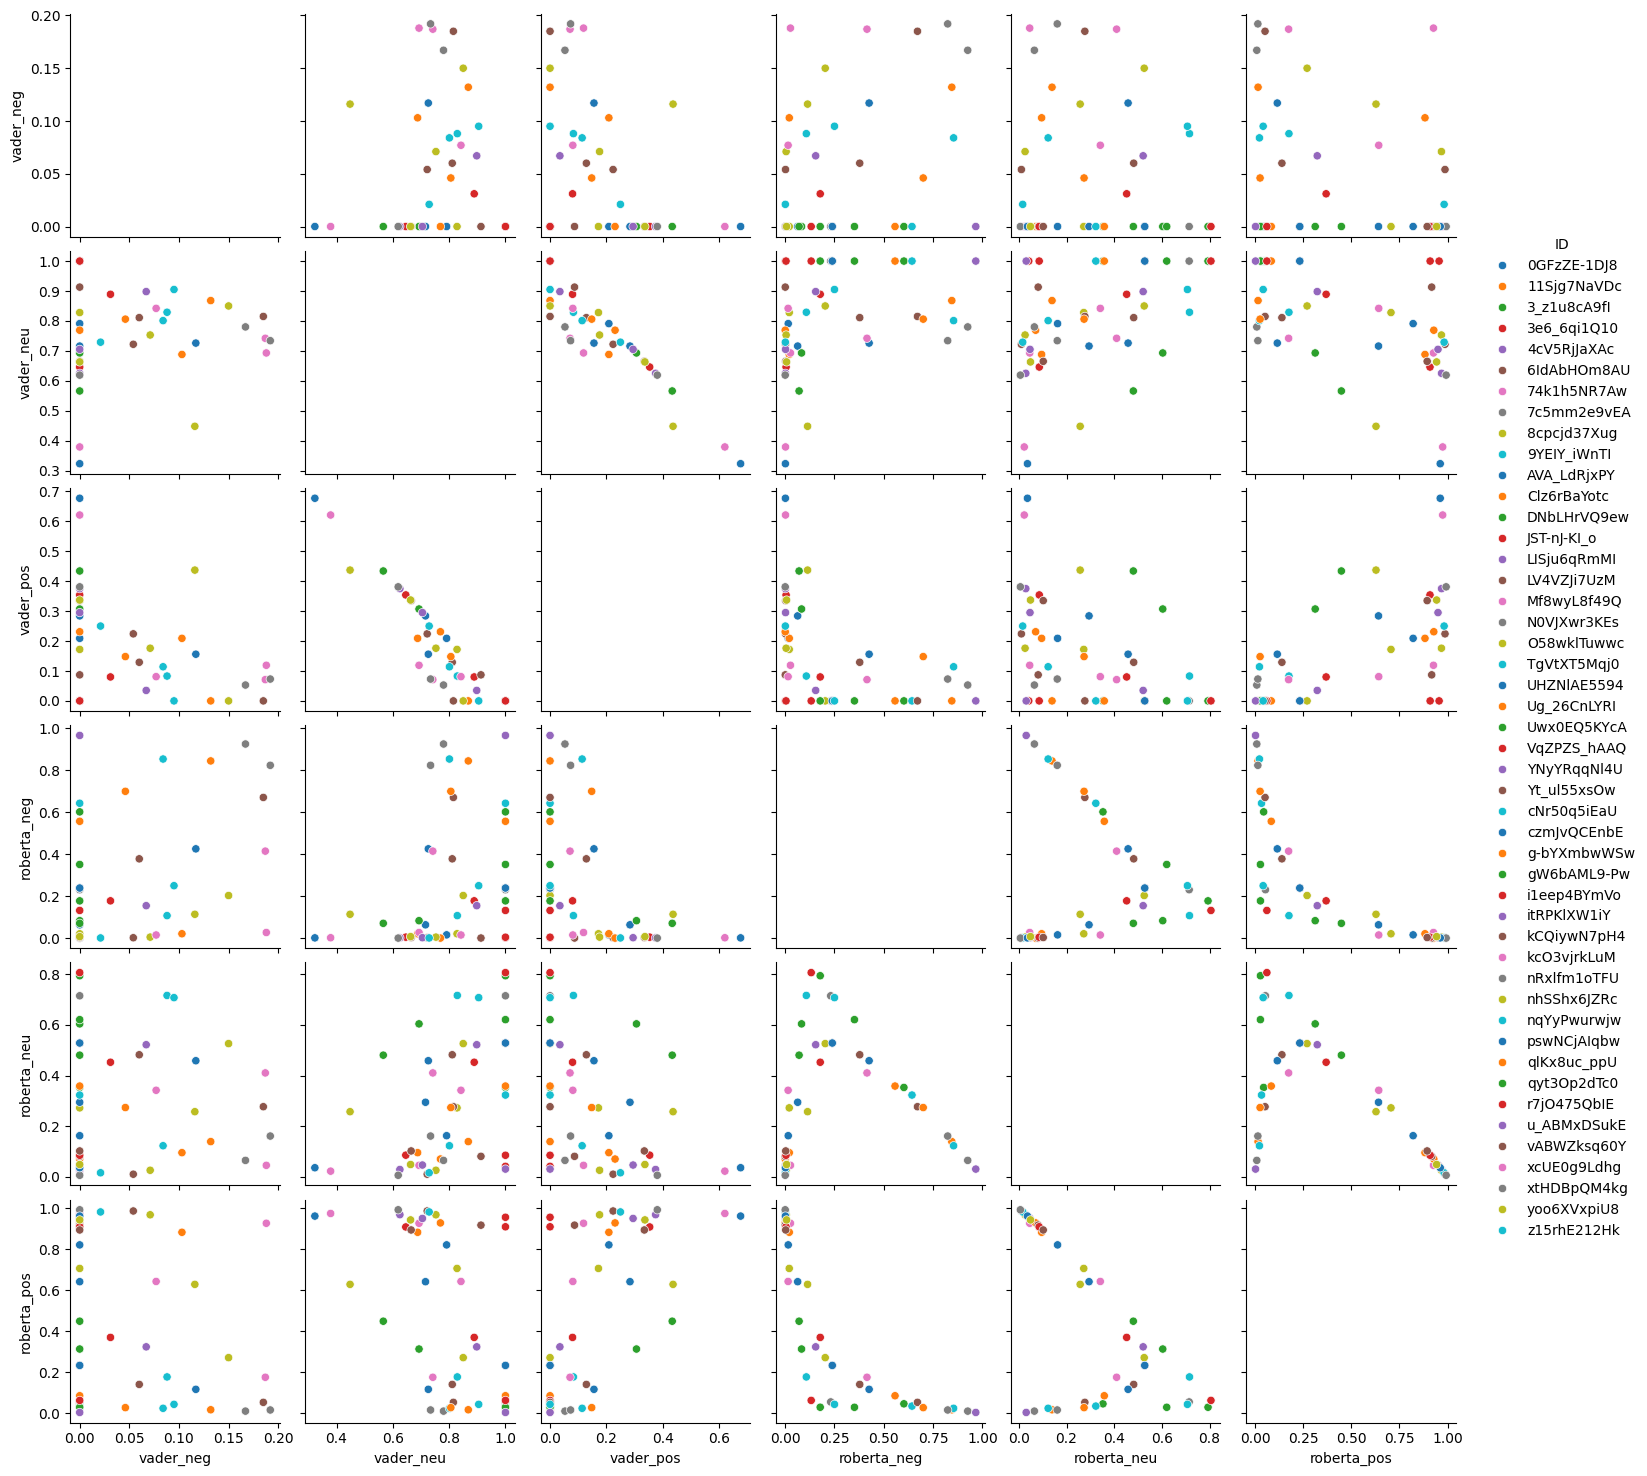

In [63]:
sns.pairplot(data=res_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='ID',
            palette='tab10')
plt.show()

We can see that again there is disparity across most if not all of the scores. Choice moving forward for the model is Roberta!